In [1]:
import pandas as pd   #importing pandas
df = pd.read_csv("/content/student-scores.csv")
df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  chemistry_score             2000 non-null   int6



---

# **Data Preprocessing & Cleaning**

These columns won't add much meaning to the analysis. Hence I will drop them . 'id', 'first_name', 'last_name', 'email'

In [3]:
df = df.drop(columns =['id', 'first_name', 'last_name', 'email'])
df.head()

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


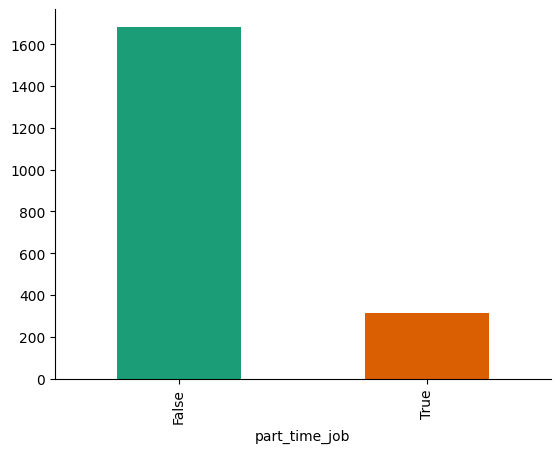

In [48]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('part_time_job').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))    #plotting bar chat of count of part_time_job
plt.gca().spines[['top', 'right',]].set_visible(False)    #to hide the top and right borders

# **Exploratory Data Analysis (EDA)**
**1. How do weekly self-study hours impact students’ scores across different subjects?**

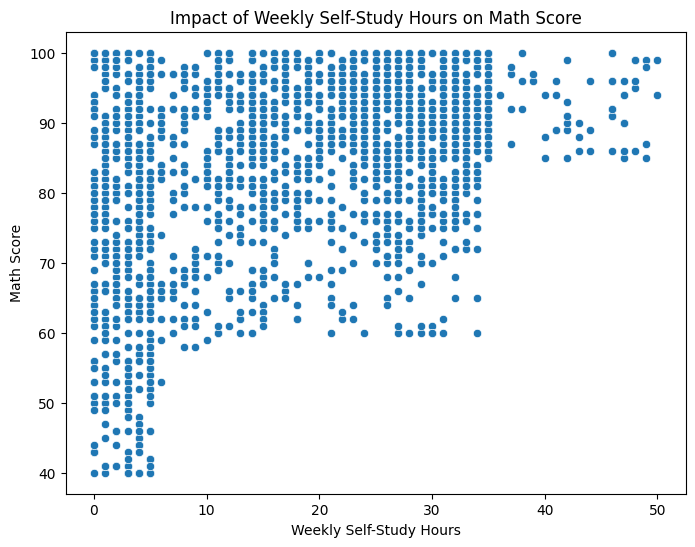

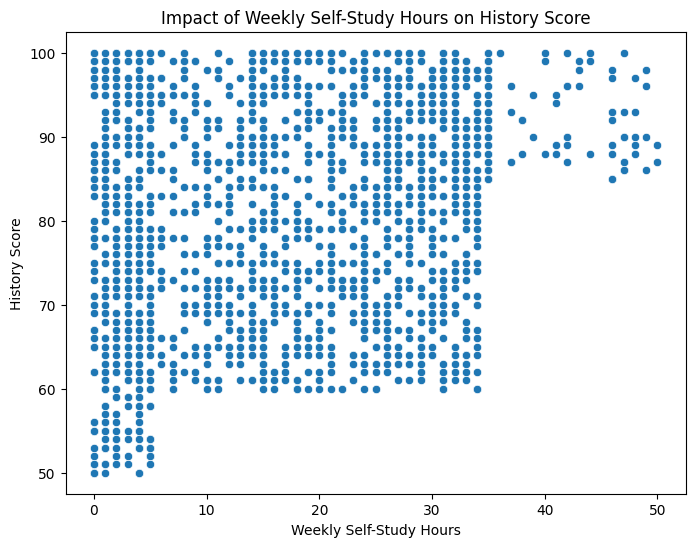

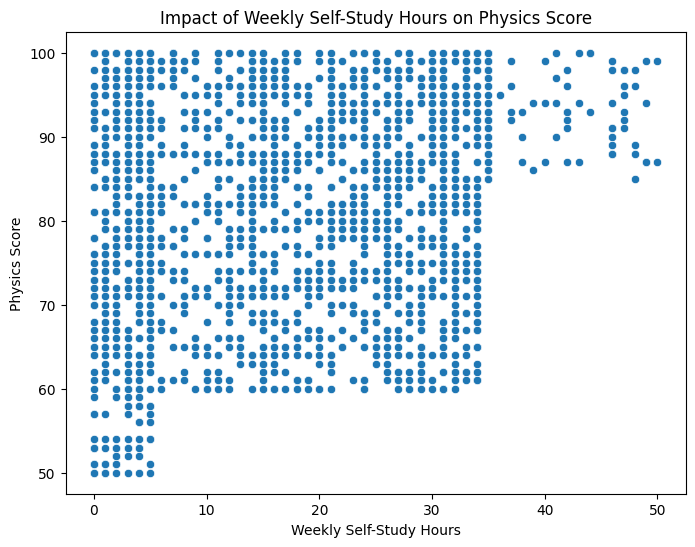

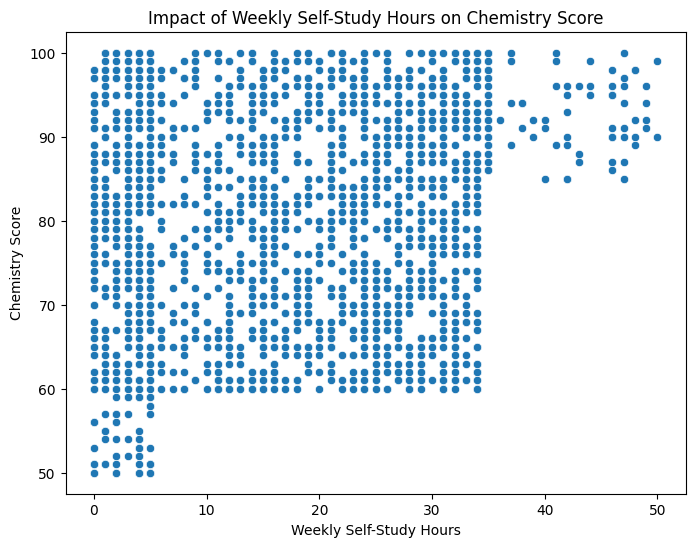

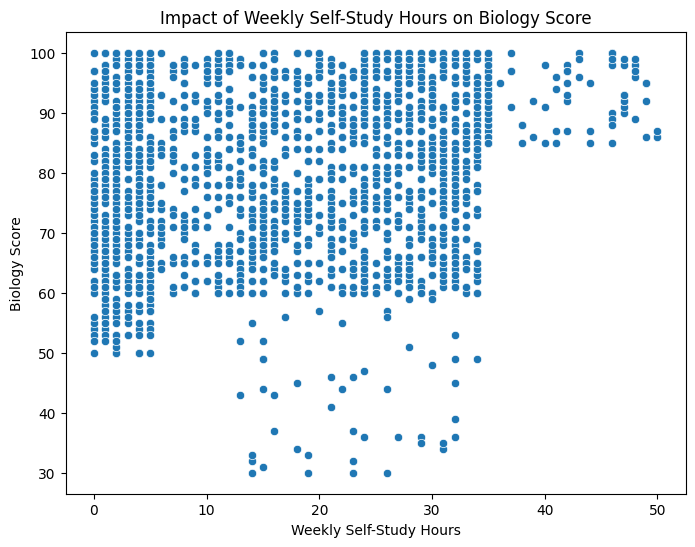

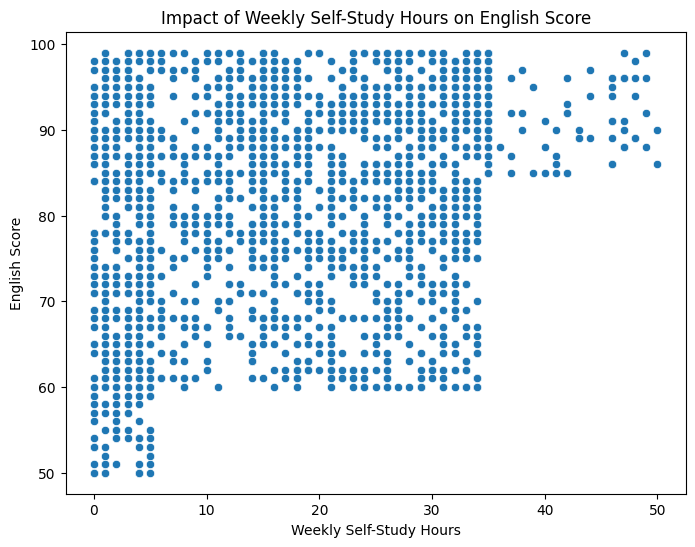

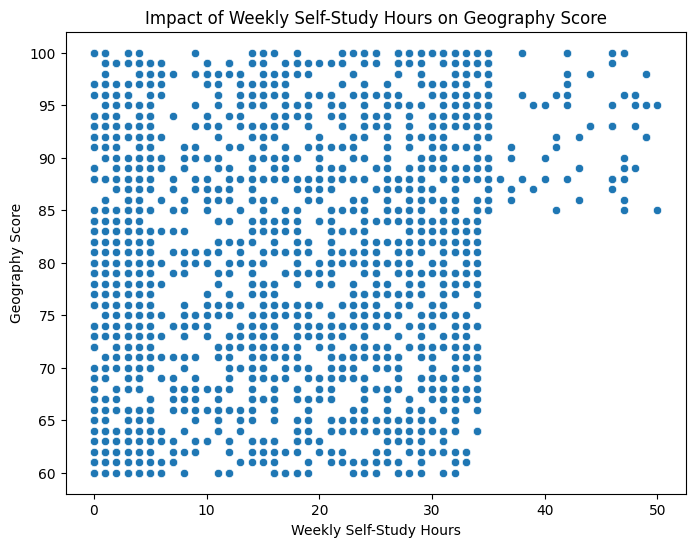

In [4]:
subjects = ['math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score', 'geography_score']   #taking all the subjects
for subject in subjects:    #for loop to iterate over each subject and plot a scatterplot
  plt.figure(figsize=(8,6))
  sns.scatterplot(x='weekly_self_study_hours', y=subject, data=df)
  plt.title(f'Impact of Weekly Self-Study Hours on {subject.replace("_", " ").title()}')    #replace the _ in each subject name with space
  plt.xlabel('Weekly Self-Study Hours')
  plt.ylabel(subject.replace("_", " ").title())
  plt.show()

In [7]:
  # Calculating correlation
  for subject in subjects:
    correlation = df['weekly_self_study_hours'].corr(df[subject])
    print(f"Correlation between weekly study hours and {subject}: {correlation}")

Correlation between weekly study hours and math_score: 0.39356929824986275
Correlation between weekly study hours and history_score: 0.2762307610309551
Correlation between weekly study hours and physics_score: 0.20211984851555598
Correlation between weekly study hours and chemistry_score: 0.20134020274229134
Correlation between weekly study hours and biology_score: 0.19048082333736122
Correlation between weekly study hours and english_score: 0.24779601535082763
Correlation between weekly study hours and geography_score: 0.15362244292021804


**2. Do students with part-time jobs perform differently compared to those without jobs?**

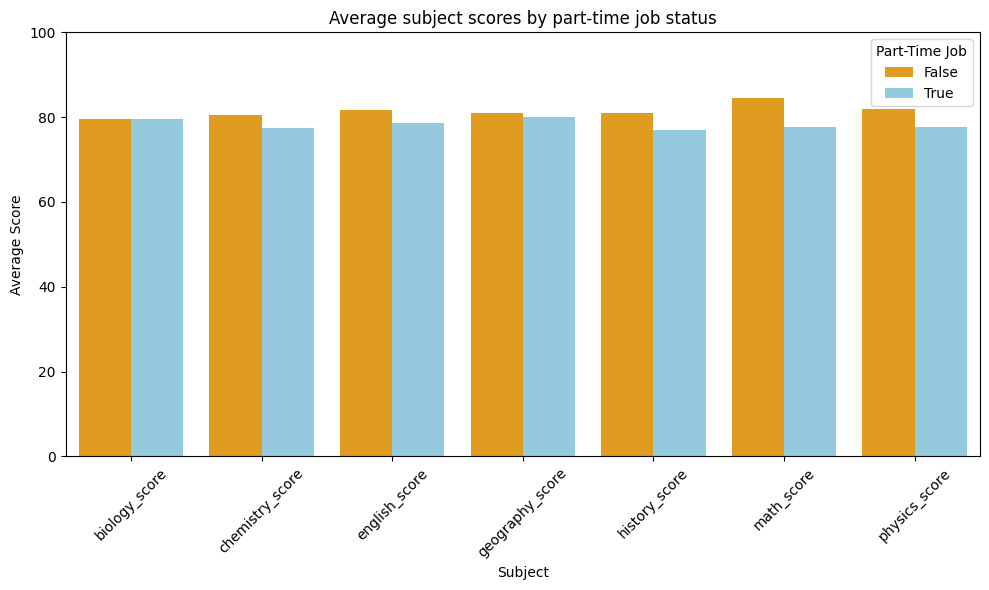

In [21]:
modified_df = df.melt(id_vars='part_time_job', value_vars=subjects,
                    var_name='Subject', value_name='Score')

# Computing average score for each subject and job status
avg_scores = modified_df.groupby(['Subject', 'part_time_job'])['Score'].mean().reset_index()

# Plotting a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Subject', y='Score', hue='part_time_job', data=avg_scores, palette = {True: 'skyblue', False: 'orange'})
plt.title('Average subject scores by part-time job status')
plt.ylabel('Average Score')
plt.xlabel('Subject')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.legend(title='Part-Time Job')
plt.tight_layout()
plt.show()

**3. Is there a relationship between absence days and lower academic performance?**

In [25]:
# Calculate the sum of all subject columns for each row as overall_grade
df['overall_grade'] = df[subjects].sum(axis=1)
df.head()

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,overall_grade
0,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87,574
1,female,False,2,False,47,Doctor,90,86,96,100,90,88,90,640
2,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94,605
3,female,False,5,False,3,Artist,71,74,88,80,89,63,86,551
4,male,False,5,False,10,Unknown,84,77,65,65,80,74,76,521


In [30]:
# Calculating the correlation between absence days and each subject score
for subject in subjects:
    correlation = df['absence_days'].corr(df[subject])
    print(f"Correlation between absence days and {subject}: {correlation}")


Correlation between absence days and math_score: -0.23707178614152702
Correlation between absence days and history_score: -0.12815879378613693
Correlation between absence days and physics_score: -0.136419206791738
Correlation between absence days and chemistry_score: -0.08402898468266592
Correlation between absence days and biology_score: -0.09055376839503826
Correlation between absence days and english_score: -0.08486110938671584
Correlation between absence days and geography_score: -0.002941597579342062


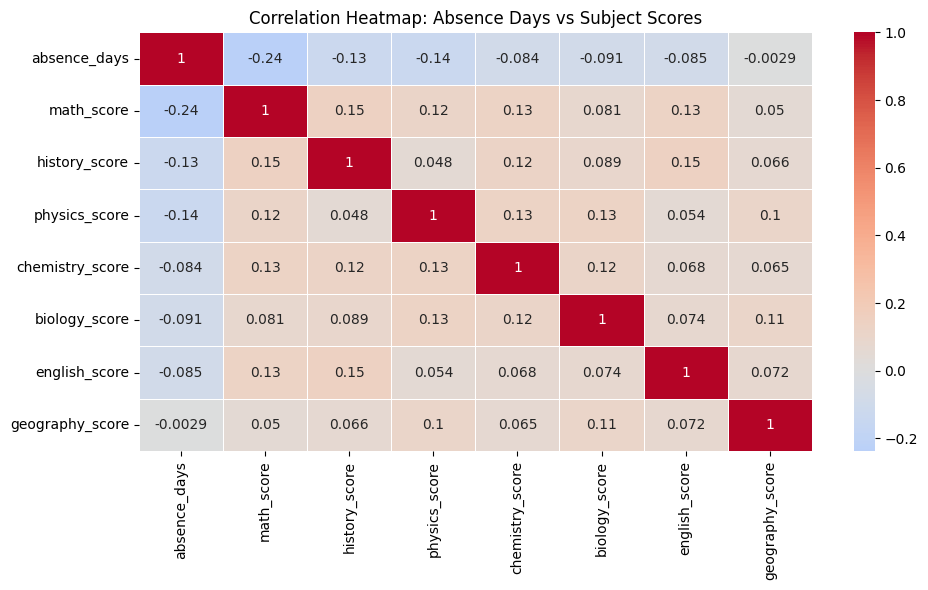

In [27]:
#Visualizing the relationship
columns_of_interest = ['absence_days'] + subjects
corr_matrix = df[columns_of_interest].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap: Absence Days vs Subject Scores')
plt.tight_layout()
plt.show()

**4. Do extracurricular activities help or hurt student performance?**

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['extracurricular_activities'] = le.fit_transform(df['extracurricular_activities'])   #encoding the extracurricular_activities column
df.head()

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,overall_grade,performance_category
0,male,False,3,0,27,Lawyer,73,81,93,97,63,80,87,574,Above Average
1,female,False,2,0,47,Doctor,90,86,96,100,90,88,90,640,Above Average
2,female,False,9,1,13,Government Officer,81,97,95,96,65,77,94,605,Above Average
3,female,False,5,0,3,Artist,71,74,88,80,89,63,86,551,Below Average
4,male,False,5,0,10,Unknown,84,77,65,65,80,74,76,521,Below Average


In [46]:
for subject in subjects:
    correlation = df['extracurricular_activities'].corr(df[subject])    #computing the correlation of extracurricular_activities and performance
    print(f"Correlation between extracurricular_activities and {subject}: {correlation}")

Correlation between extracurricular_activities and math_score: -0.05296801555038394
Correlation between extracurricular_activities and history_score: 0.012526339059908242
Correlation between extracurricular_activities and physics_score: -0.009332612545715165
Correlation between extracurricular_activities and chemistry_score: -0.00300710511201172
Correlation between extracurricular_activities and biology_score: -0.010062163650059016
Correlation between extracurricular_activities and english_score: -0.0034280422583215582
Correlation between extracurricular_activities and geography_score: -0.040877375119242734


**5. Which subject has the strongest correlation with overall academic success?**

In [33]:
for subject in subjects:
    correlation = df['overall_grade'].corr(df[subject])
    print(f"Correlation between overall_grade and {subject}: {correlation}")

Correlation between overall_grade and math_score: 0.5081161343941433
Correlation between overall_grade and history_score: 0.48689966421632913
Correlation between overall_grade and physics_score: 0.472103679638105
Correlation between overall_grade and chemistry_score: 0.4922159991953377
Correlation between overall_grade and biology_score: 0.5023912149926252
Correlation between overall_grade and english_score: 0.4515498468091522
Correlation between overall_grade and geography_score: 0.41592901216773587


**6. Does gender influence academic performance?**

<ipython-input-36-e6aa337ce002>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='overall_grade', data=df, estimator='mean', palette = {'male': 'blue', 'female': 'pink'})


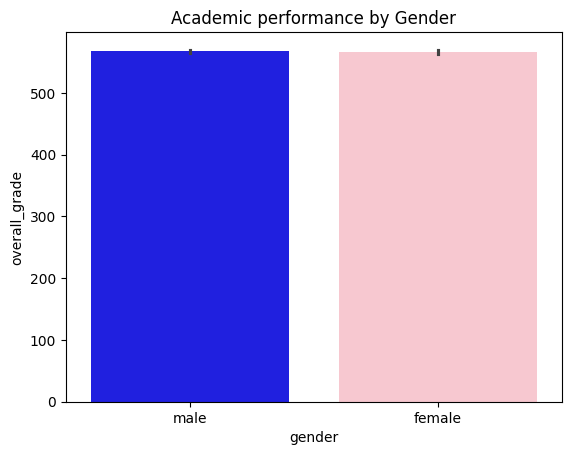

In [36]:
sns.barplot(x='gender', y='overall_grade', data=df, estimator='mean', palette = {'male': 'blue', 'female': 'pink'})
plt.title('Academic performance by Gender')
plt.show()


**7. What are the common characteristics of students who perform above average or below average?**


In [50]:
average_performance = df['overall_grade'].mean()  # Calculating the average overall grade

# Next is to categorize students as above average or below average
df['performance_category'] = df['overall_grade'].apply(lambda x: 'Above Average' if x > average_performance else 'Below Average')

# The distribution of 'part_time_job' for both groups
print(df.groupby('performance_category')['part_time_job'].mean())
print("------------------------------------------------------------------------")

print(df.groupby('performance_category')['weekly_self_study_hours'].mean())
print("------------------------------------------------------------------------")

# The distribution of 'absence_days' for both groups
print(df.groupby('performance_category')['absence_days'].mean())
print("------------------------------------------------------------------------")

# Does gender affect performance?
print(df.groupby('performance_category')['gender'].value_counts())

performance_category
Above Average    0.111002
Below Average    0.206721
Name: part_time_job, dtype: float64
------------------------------------------------------------------------
performance_category
Above Average    22.012770
Below Average    13.342159
Name: weekly_self_study_hours, dtype: float64
------------------------------------------------------------------------
performance_category
Above Average    3.252456
Below Average    4.093686
Name: absence_days, dtype: float64
------------------------------------------------------------------------
performance_category  gender
Above Average         male      514
                      female    504
Below Average         female    498
                      male      484
Name: count, dtype: int64


# **Insights & Interpretation**

There are fewer students with part-time jobs compared to students without part-jobs.

There is a positive correlation between weekly study hours and scores in each subject. This means that the more the time invested in studying weekly, the higher the overall score.

Absence days has negative correlation with performance across all subjects. What this meanis that the more the number of days absent, the lower the grades in each of the subject.

Extra-curricular activities correlates negatively with all the subjects' grades save history. A student involved in extracurricular activities is more likely to have low grades in all subject except history.

Mathematics has the strongest correlation of 0.51 with overall score.

Gender doesn't have any effect on academic performance. A female student is as likely to excell academically as a male student, all things being equal.

In general, students who perform above average study for more hours weekly, have no part time jobs and are absent for fewer number of days.